# Sheet 4 Exercise 2: Nonlinear Decision Network (Credits: 6)
Note: The notebook contains all problems parts of the second exercise. Please create the plots that are asked for in the notebook and type out the corresponding interpretations. All computations are supposed to be carried out by hand! You need to submit your computations to complete the exercise. You can either write your computations into the notebook using LaTeX syntax, or submit them on paper (scan).

Consider a network consisting of two linear threshold neurons that inhibit each other. The inhibition strength is given by the parameter $c$, and the firing threshold by $\theta$. Together with respective input signals $s_1$ and $s_2$, the model is governed by the nonlinear differential equations
$$
\begin{align}
\tau \dot{u}_1(t) = - u_1 (t) - c[u_2 - \theta]_+ + s_1, \\
\tau \dot{u}_2(t) = - u_2 (t) - c[u_1 - \theta]_+ + s_2.
\end{align}
$$
The linear threshold function is defined by $[x]_+ := \max\{x,0\}$.

#### 2.1
Show that the network can be reparameterized in the standard form
$$
\begin{align}
\dot{\tilde{u}}_1(\tilde{t}) = - \tilde{u}_1 (\tilde{t}) - c[\tilde{u}_2(\tilde{t})]_+ + \tilde{s}_1, \\
\dot{\tilde{u}}_2(\tilde{t}) = - \tilde{u}_2 (\tilde{t}) - c[\tilde{u}_1(\tilde{t})]_+ + \tilde{s}_2.
\end{align}
$$

In the following, we drop the tildes and simply consider the standard form. Assume $c = 2$ and $s_1 = s_2 = 1$ (as written in the standard form).

#### 2.2
The system can now be written as 

$$
\dot{u} = - u - c\begin{pmatrix} 0&1\\1&0 \end{pmatrix}[u]_+ + s.
$$

Plot the vector field of the dynamical system as a quiver plot. What does the plot tell you about the dynamics of the system?

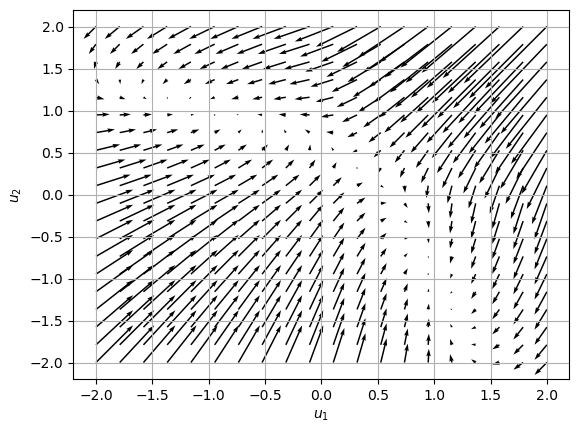

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def system(u, c, s):
    u1, u2 = u
    du1dt = -u1 - c * max(0, u2) + s[0]
    du2dt = -u2 - c * max(0, u1) + s[1]
    return [du1dt, du2dt]

s = np.array([1, 1]).T
c = 2
u1 = np.linspace(-2, 2, 20)
u2 = np.linspace(-2, 2, 20)
U1, U2 = np.meshgrid(u1, u2)

du1dt, du2dt = np.zeros_like(U1), np.zeros_like(U2)

for i in range(U1.shape[0]):
    for j in range(U2.shape[1]):
        du = system([U1[i, j], U2[i, j]], c, s)
        du1dt[i, j] = du[0]
        du2dt[i, j] = du[1]

plt.quiver(U1, U2, du1dt, du2dt, scale=40)
plt.xlabel('$u_1$')
plt.ylabel('$u_2$')
plt.grid()
plt.show()

**Interpretation:** There are three fixed point, two of them being stable and one of them is a saddle point.

#### 2.3
Note that inside any of the four quadrants, the linear threshold function is linear in both $u_1$ and $u_2$. Thus the whole system is piecewise linear. Compute the fixed points inside each quadrant by treating the system as a linear system restricted on each quadrant seperately, namely
1. $u_1$, $u_2 > 0$,
2. $u_1 > 0$, $u_2 \leq 0$,
3. $u_1 \leq 0$, $u_2 > 0$,
4. $u_1$, $u_2 \leq 0$.

Analyze the stability of the fixed points by computing the eigenvalues of the system matrix for each quadrant. How do the results relate to the plot observed in 2.2?

*Hint:* Note that the dynamics within a given quadrant may have fixed points *outside* of this quadrant. Of course, these are not relevant for us as different quadrants are governed by different dynamics.

**Explanation:** extra file.

#### 2.4
Consider asymmetrical inputs, namely
1. $s_1 = 1.5$, $s_2 = 1$,
2. $s_1 = 1$, $s_2 = 1.5$.

Using quiver and stream plots, analyze the (asymptotical) behaviour of the system for the initial conditions $(0,0)$, $(1,-1)$ and $(-1,1)$.

How do you interpret the behaviour in terms of neural decision mechanisms based on inputs $s_1$ and $s_2$?

*Hint:* The documentation for stream plots can be found here: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.streamplot.html. They are created in the same way as quiver plots and conveniently visualize the system's flow.

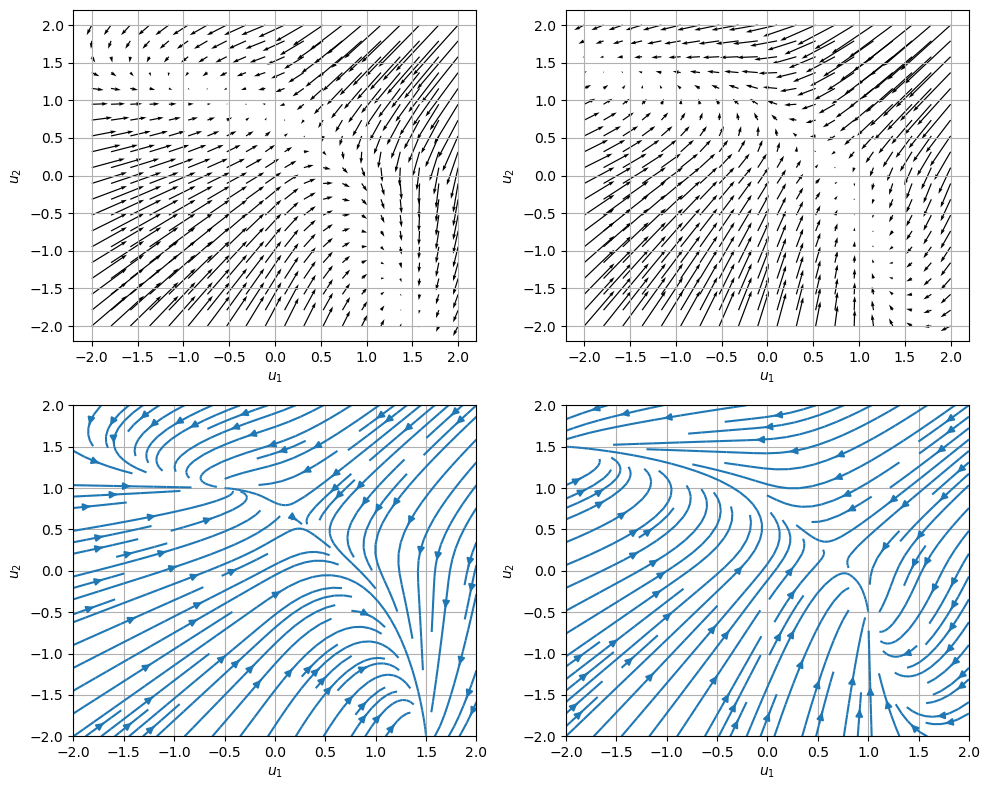

In [12]:
s1 = np.array([1.5, 1]).T
s2 = np.array([1, 1.5]).T
c = 2

du1dt, du2dt = np.zeros_like(U1), np.zeros_like(U2)
du12dt, du22dt = np.zeros_like(U1), np.zeros_like(U2)

for i in range(U1.shape[0]):
    for j in range(U2.shape[1]):
        du = system([U1[i, j], U2[i, j]], c, s1)
        du1dt[i, j] = du[0]
        du2dt[i, j] = du[1]
        du = system([U1[i, j], U2[i, j]], c, s2)
        du12dt[i, j] = du[0]
        du22dt[i, j] = du[1]

fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2,figsize = (8, 8))
ax1.quiver(U1, U2, du1dt, du2dt, scale=40)
ax1.set_xlabel('$u_1$')
ax1.set_ylabel('$u_2$')
ax2.quiver(U1, U2, du12dt, du22dt, scale=40)
ax2.set_xlabel('$u_1$')
ax2.set_ylabel('$u_2$')
ax1.grid()
ax2.grid()
ax3.streamplot(U1, U2, du1dt, du2dt)
ax3.set_xlabel('$u_1$')
ax3.set_ylabel('$u_2$')
ax4.streamplot(U1, U2, du12dt, du22dt)
ax4.set_xlabel('$u_1$')
ax4.set_ylabel('$u_2$')
ax3.grid()
ax4.grid()
plt.tight_layout()
plt.show()

**Interpretation:** If one of the signals is stronger than the other, the solution goes for more inital conditions to the stable fixed point corresponding to this signal. 

#### 2.5
Now set $s_1=s_2=1$, $c=-2$. Plot again the vector field. How you you explain the behaviour? In particular, how do you explain the result when taking into account the system matrix' eigenvalues?

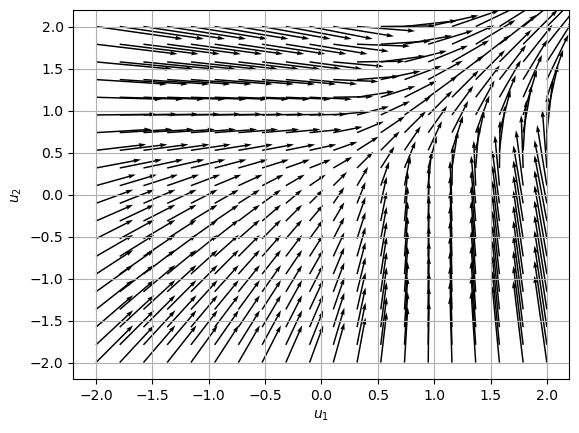

In [13]:
s = np.array([1, 1]).T
c = -2

u1 = np.linspace(-2, 2, 20)
u2 = np.linspace(-2, 2, 20)
U1, U2 = np.meshgrid(u1, u2)

du1dt, du2dt = np.zeros_like(U1), np.zeros_like(U2)

for i in range(U1.shape[0]):
    for j in range(U2.shape[1]):
        du = system([U1[i, j], U2[i, j]], c, s)
        du1dt[i, j] = du[0]
        du2dt[i, j] = du[1]

plt.quiver(U1, U2, du1dt, du2dt, scale=40)
plt.xlabel('$u_1$')
plt.ylabel('$u_2$')
plt.grid()
plt.show()

**Explanation:** If the inhibition is negative, all inital conditions diverge. The fixed point for u1,u2>0 changed the location to (-1,-1), which is why it diverges in this quadrant. The fixed point for all other quadrants changed to a fixed inside the u1,u2 quadrant, which is why all inital conditions converge into the u1,u2>0 quadrant and then diverge.

#### 2.6
Replace the linear threshold function $[\cdot]_+$ by a step treshold function given by
$$
1(x) = \begin{cases} 0, & x \leq 0  \\ 1, & x > 0\end{cases}.
$$

Set $s_1=s_2=1$. Analyze the fixed points and eigenvalues for each quadrant like in 2.3 for $c=2$ and $c=-2$.

Plot the vector fields. Can you explain the difference in the the system's behaviour with a linear threshold and
with a step threshold function?

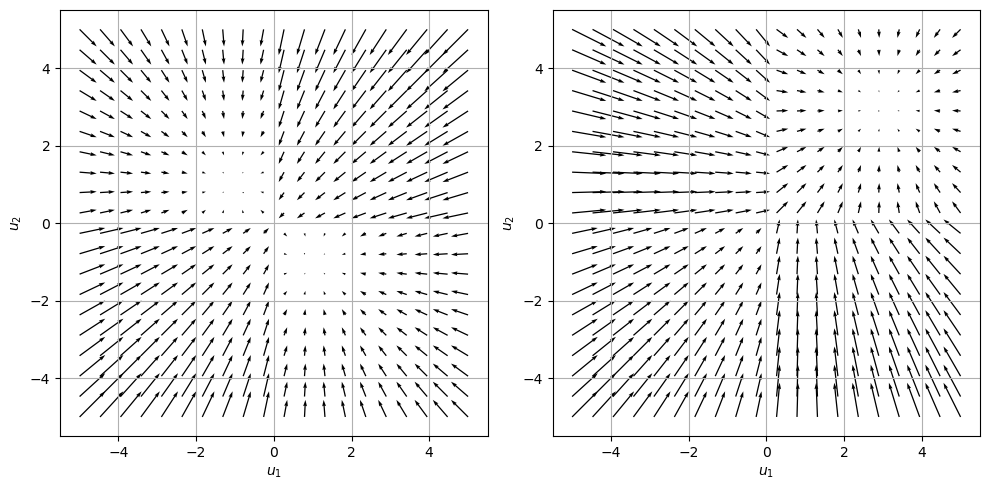

In [14]:
def system(u, c, s):
    u1, u2 = u
    du1dt = -u1 - c * np.heaviside(u2, 0) + s[0]
    du2dt = -u2 - c * np.heaviside(u1, 0) + s[1]
    return [du1dt, du2dt]

s = np.array([1, 1]).T
c1 = 2
c2 = -2

u1 = np.linspace(-5, 5, 20)
u2 = np.linspace(-5, 5, 20)
U1, U2 = np.meshgrid(u1, u2)
du1dt, du2dt = np.zeros_like(U1), np.zeros_like(U2)
du12dt, du22dt = np.zeros_like(U1), np.zeros_like(U2)

for i in range(U1.shape[0]):
    for j in range(U2.shape[1]):
        du = system([U1[i, j], U2[i, j]], c1, s)
        du1dt[i, j] = du[0]
        du2dt[i, j] = du[1]
        du = system([U1[i, j], U2[i, j]], c2, s)
        du12dt[i, j] = du[0]
        du22dt[i, j] = du[1]

fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10, 5))
ax1.quiver(U1, U2, du1dt, du2dt, scale=100)
ax1.set_xlabel('$u_1$')
ax1.set_ylabel('$u_2$')
ax2.quiver(U1, U2, du12dt, du22dt, scale=100)
ax2.set_xlabel('$u_1$')
ax2.set_ylabel('$u_2$')
ax1.grid()
ax2.grid()
plt.tight_layout()
plt.show()

**Explanation:** When the linear threshold function is replaced by a step funciton, dx is not as smooth anymore as before. but since the values can now only be 0 or 1, at some point the constant takes over which results in a stable fixed point in the second plot. Other part of analysis is on the scanned document.